# Chapter 7
## Supervised Learning: Predicting Customer Churn
### Overview

In this chapter, you will perform classification tasks using logistic regression and implement the most widely used data science pipeline - **Obtain, Scrub, Explore, Model,** and **iNterpret (OSEMN)**. You will interpret the relationshihp between the target and explanatorfy variables by performing data exploration. This will in turn help in selecting features for building predictive models. You will use these concepts to train your churn model. You will also perform logistic regression as a baseline model to predict custoemr churn. 

### Classification Types

**Binary Classification** - The target variable can have only two categorical values or classes. X is or X is not. 

**Multiclass Classification** - The target variable can have multiple classes. Given X , X can be equal to A, B, or C. 


### Logistic Regression

Is modeling the mean of the response variable, p, in terms of an explanatory variable, x, as probablistic model in terms of the odds ratio. 

The odds ratio is  the ratio of two probabilities - the probability of the event occurring, and the probability of the event not occurring. 

**Assumptions of Logistic Regression:**
- Unlike linear regression, logistic regression does not assume linearity between the independent variables (x) and the target variable (y).
- The dependent variable must be binary (have two categories).
- The independent variable need not have intervals, be normally distributed, linearly related, or have equal variance within each group.
- The categories must be mutually exclusive and exhaustive.

**Importing the logistic regression model:**
- from sklearn import linear_model
- logit = linear_model.LogisticRegression()
- logit.fit(X_train, y_train)
- logit.predict(X)
- logit.score(X_train, y_train) to get the training score
- logit.score(X_test, y_test) to get the test score for the trained model

## Exercise 7.01: Comparing Predictions by Linear and Logistic Regression on the Shill Bidding Dataset

The dataset contains details regarding auctions done for various products on eBay.com. The target column, Class, provides information about bidding behavior, 0 being normal and 1 being abnormal behavior. Develop a machine learning model that can predict whether the bidding behavior in a particular model is normal (0) or not (1). Apply linear and logistic regression to predict the output and check which one of them is useful in this situation. 

In [1]:
import pandas as pd , numpy as np

from sklearn.model_selection import train_test_split

from sklearn import linear_model

import matplotlib.pyplot as plt

In [2]:
bids = pd.read_csv('Exercise7.01/Shill_Bidding_Dataset.csv')
bids.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Remove columns that are irrelevant to the case study; remove Record_ID, Auction_ID, and Bidder_ID columns. These columns contain unique IDs and do not add any new information to the model. 

In [3]:
bids.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1, inplace=True)

bids.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Split the Data into training and testing sets. Use random_state = 1. 

In [4]:
X = bids.drop('Class', axis = 1)

y = bids['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

print("Training dataset size: {}, Testing dataset size: {}".format(X_train.shape, X_test.shape))

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


**Fit the model using Linear Regression**

In [5]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Predict the first 10 test data points and check the target y values

In [6]:
linear.predict(X_test)[:10]

array([-0.00375542, -0.00248633, -0.01090699, -0.02753235,  0.01939224,
        0.99493654,  0.02761226, -0.00565047,  0.48101551,  0.00471959])

In [7]:
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Evaluate the score of the linear regression model on the training and teting datasets

In [8]:
print('Score on training dataset: {}, '
     'Score on the testing dataset: {} '.format(linear.score(X_train,y_train),
                                               linear.score(X_test, y_test)))

Score on training dataset: 0.8166836356918417, Score on the testing dataset: 0.8119909602893054 


**Fit the model using logistic regression**

In [9]:
logit = linear_model.LogisticRegression()

logit.fit(X_train, y_train)

LogisticRegression()

Predict the first 10 test data points and check the target y values


In [10]:
logit.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Evaluate the score of the logistic regression model on the training and teting datasets

In [12]:
print('Score on training dataset: {}, '
     'Score on the testing dataset: {} '.format(logit.score(X_train,y_train),
                                               logit.score(X_test, y_test)))

Score on training dataset: 0.9794303797468354, Score on the testing dataset: 0.9715340010542962 


1. Logistic regression can predict descrete classes as outputs, unlike lineaeer regression, which gave us non-discrete values
2. Logistic regression was able to obtain a much higher score compared to lineaer regression. 

**Logistic Regression was able to perform much better compared to Linear Regression and is more suited for classification tasks.**

### End Exercise 7.01

### Creating a Datascience Pipeline (OSEMN):

1. Obtaining the data, which can be from any source: Structured, unstructured, or semi-structured
2. Scrubbing the data, which means getting your hands dirty and cleaning the data. 
3. Exploring the data to find relationships between each of the variables. 
4. Modeling the data, predicting, forecasting, and clustering.
5. iNterpreting the data, combining all analyses andn results to draw a conclusion.

### Churn Prediction Case Study: 
You work at a bank that is aiming to increase market share. Recently, the number of customers using the bank has declined. Find out the reason for customer churn and predict future customer churn.

## Exercise 7.02: Obtaining the Data

Import the banking data and. do some initial checks. 

In [13]:
import seaborn as sns

In [14]:
churn = pd.read_csv('Exercise7.02/Churn_Modelling.csv')

churn.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [15]:
#Check the number of rows

len(churn)
churn.shape

(10000, 12)

### End Exercise 7.02


## Exercise 7.03: Imputing Missing Values

In [16]:
#check for missing values 

churn.isnull().values.any()

True

In [17]:
churn.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

**Gender, Age,** and **EstimatedSalary** columns are missing values. 

In [18]:
#Use the describe function to explore the data in the Age and EstimatedSalary Columns

churn[['EstimatedSalary', 'Age']].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [19]:
churn.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the descriptive statistics we can observe that HasCrCard column is categorical

In [20]:
#Check the count of 0's and 1's in the the column

churn['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [21]:
#Find out the total number of missing values

churn.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [22]:
#Find the percentage of missing values

round(churn.isnull().sum()/len(churn)*100,2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [23]:
#Check the data types of the missing columns:

churn[['Gender','Age','EstimatedSalary']].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

Impute the missing values. You can do this by dropping the rows that have missing values, filling in the missing values with a test statistic (Mean, Median, Mode), or predicting the missing values using a machine learning algorithm. 

In [24]:
#Fill the missing values for EstimatedSalary with the mean:

mean_value = churn['EstimatedSalary'].mean()

churn['EstimatedSalary'] = churn['EstimatedSalary'].fillna(mean_value)

In [25]:
#Check how many instances of each gender are present:

churn['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

As a rule of thumb, you fill the missing values with the more frequently occurring entry. 

In [26]:
churn['Gender']=churn['Gender'].fillna(churn['Gender'].value_counts().idxmax())

In [27]:
# Use the mode for Age to fill the missing values

churn['Age'].mode()
mode_value=churn['Age'].mode()
churn['Age']=churn['Age'].fillna(mode_value[0])

In [28]:
#Check to see if the missing values have been imputed

churn.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

### End Exercise 7.03

## Exercise 7.04: Renaming Columns and Changing the Data Type

In [29]:
#Rename the CredRate, ActMan, Prod Number, and Exited columns

churn = churn.rename(columns={'CredRate':'CreditScore',
                             'ActMem':'IsActiveMember',
                             'Prod Number': 'NumOfProducts',
                             'Exited':'Churn'})

churn.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [30]:
#Move Churn column to the right 


column_churn = churn['Churn']
churn.drop(labels=['Churn'], axis = 1, inplace= True)
churn.insert(len(churn.columns), 'Churn', column_churn.values)

churn.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [31]:
#Change the data type of Geography, Gender, HasCrCard, Churn, IsActiveMember to Category

churn['Geography'] = churn['Geography'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['HasCrCard'] = churn['HasCrCard'].astype('category')
churn['Churn'] = churn['Churn'].astype('category')
churn['IsActiveMember'] = churn['IsActiveMember'].astype('category')

In [32]:
churn.dtypes

CustomerId            int64
CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

### End Exercise 7.04

## Data Exploration

1.  Statistical Overview
- inspecting the data using general descriptive statistics. 
2.  Correlation
- measures the linear relationship between two variables.
- -1 Perfect negative relationship
- 0 No linear Relationship
- 1 Perfect positive relationship



## Exercise 7.05: Obtaining the Statistical Overview and Correlation Plot

Find the number of customers that churned using basic exploration techniques. Obtain the percent of customers who churned, the percentage of customers who have a credit card, and more. Plot a correlation Matrix. 

In [33]:
#inspect how many customers have churned
churn['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

7963 Customers did not Churn, 2037 Customers have churned.

In [34]:
# inspect the percentage of customers who have left the bank

churn['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

20.37% have churned. 

In [35]:
#inspect how many customers have a credit card

churn['HasCrCard'].value_counts(1)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

70.55% have a credit card. 

29.45% do not have a credit card

In [36]:
# Get the statistical overview of the data

churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,7.193619e+04,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [37]:
#Inspect the mean attributes of the customers who have cchurned campared to those who have not. 

summary_churn = churn.groupby('Churn')
summary_churn.mean()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,1.569117e+07,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [38]:
#Find the median attributes of the customers

summary_churn.median()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,102460.84


In [39]:
# Use seaborn to plot a correlation matrix

churn.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,1.000000,0.005308,0.009696,-0.014883,-0.012419,0.016972,0.015272
CreditScore,0.005308,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,0.009696,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,-0.014883,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,-0.012419,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.016972,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,0.015272,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


<AxesSubplot:>

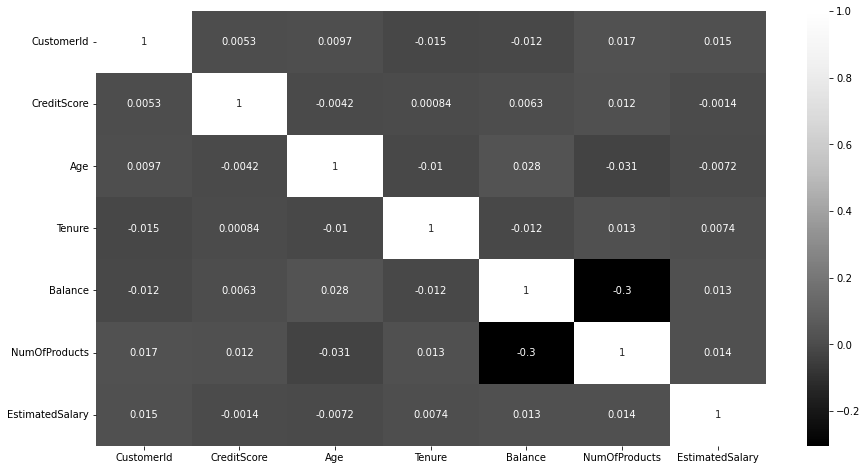

In [40]:
corr = churn.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, cmap='Greys_r')

The correlation statistics and plot provides the correlation between our continuous features. 

- NumOfProducts and Balance have a negative correlation of -0.304
- Balance and Age have a positive correlation of 0.028
- The magnitude of the correlation decides to what extent the change in value in one feature affects the change in value in the second feature
- Change in NumOfProducts will have a stronger effect on Balance than it will on Age.

### End Exercise 7.05

## Visualizing Data

- Univariate data analysis focuses on 1 variable
- Bivariate data analysis requires understanding the effect of one variable on another.

- Bar Chart & Histogram help in understanding the distribution of a feature in the dataset (Univariate)
- Scatterplot helps analyze two continuous variables present in the dataset (Bivariate)


| EDA for Univariate Data | EDA for Bivariate Data |
| ----------- | ----------- |
| **1. Distribution Analysis| 1. Two categorical Variables Analysis** |
| A. Bar Chart | A. Mosaic Plot |
| B. Histogram | B. Trellis Bar Chart|
| **2. Deviation Analysis | 2. Two Continuous Variables** |
| A. Boxplot |  A. Scatter Plot |
|             | B. Scatter Plot Matrix|
|            | C. Trellis Scatter Plots|
| **3. Part Whole Analysis | 3. Part whole Analysis** |
| A. Pie Chart | A. Pie Chart |
| B. Pareto Chart | B. Pareto Chart|
| **4. Trend Patterns | 4. One Categorical and One Continuous**|
| A. Line Graph | A. Trellis Box Plot / Histogram |

### Types of Seaborn Plots

- sns.distplot (histplot or displot) , Distribution Plot for univariate continuous variables. 
- sns.countplot , Distribution of categorical/discrete variables, bivariate. 
- sns.kdeplot , Distribution of observations for continuous Variables, Univariate
- sns.barplot , plot bar plots, Bivariate

## Exercise 7.06: Performing Exploratory Data Analysis (EDA)

Perform EDA on the churn_modelling dataset. Come up with inferences , and relationships between features such as geography, customer age, customer bank balance, and more with respect to churn. 

Text(0, 0.5, 'No of Customers')

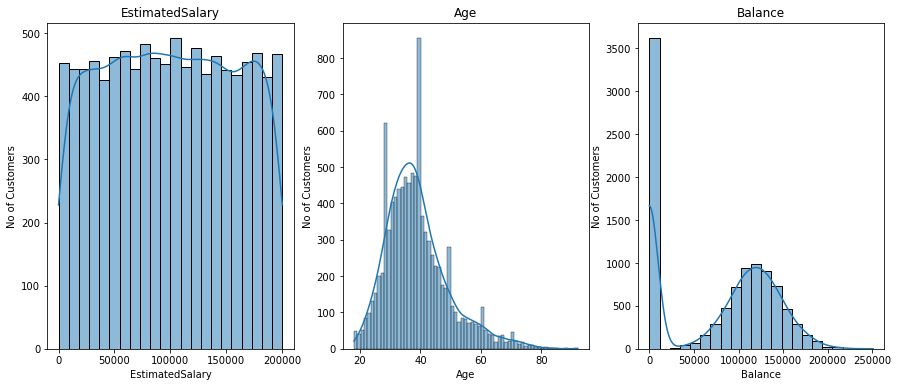

In [41]:
# Start with Univariate analysis. Plot the distribution graph of customers for the Estimated Salary, Age, and Balance.

f, axes = plt.subplots(ncols=3, figsize=(15,6))


#EstimatedSalary
sns.histplot(churn.EstimatedSalary, kde = True, 
            ax = axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')


#Age
sns.histplot(churn.Age, kde = True, 
            ax = axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')



#Balance
sns.histplot(churn.Balance, kde = True, 
            ax = axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

- **EstimatedSalary:** The distribution seems to be a plateau distribution. More or less constant. 

- **Age:** Normal distribution skewed to the right. majority of customers lie within the 30 - 45 range.

- **Balance:** Bimodal Distribution, Outlier exists. 

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

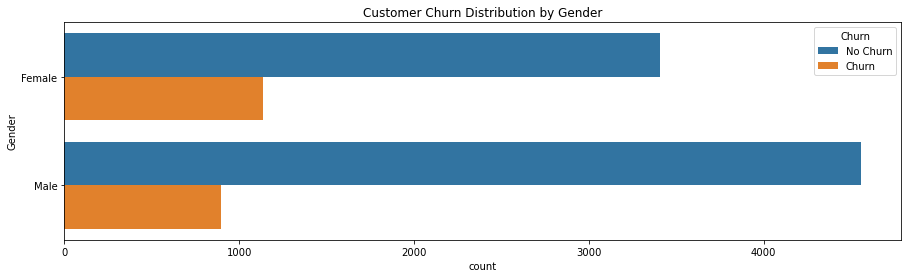

In [42]:
# Bivariate Analysis, Inspect whether there is a difference in churn for Gender. 

plt.figure(figsize=(15,4))

p=sns.countplot(y='Gender', hue='Churn', data=churn)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Churn Distribution by Gender')

Females have more churn. 

Text(0.5, 1.0, 'Customer Geography Distribution ')

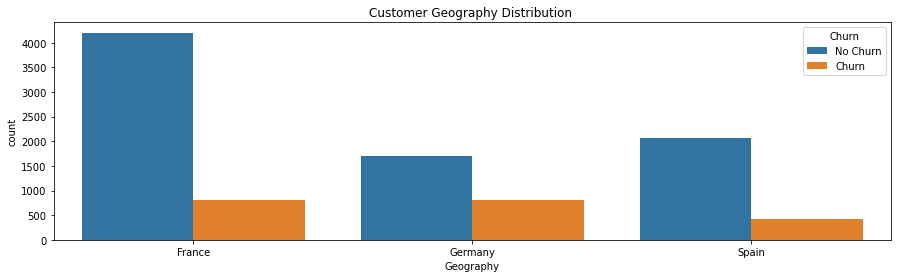

In [43]:
#plot geography versus churn

plt.figure(figsize=(15,4))

p=sns.countplot(x='Geography', hue='Churn', data=churn)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Geography Distribution ')

Those that Churned and did not churn is less for Germanny and Spain in comparison to France. Ffrance has the highest number of customers. 

Text(0.5, 1.0, 'Customer Distribution by Product ')

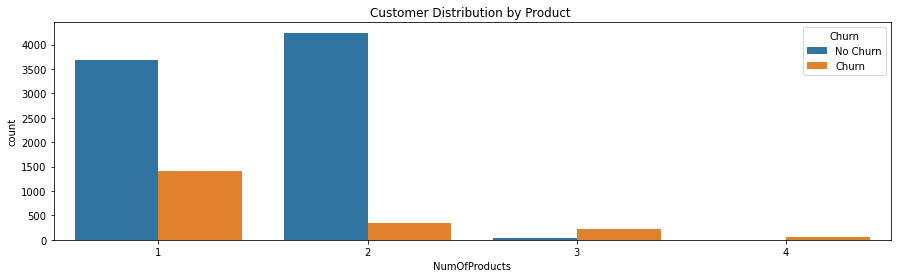

In [44]:
#Plot NumOfProducts versus Churn

plt.figure(figsize=(15,4))

p=sns.countplot(x='NumOfProducts', hue='Churn', data=churn)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Distribution by Product ')

Largest Churn was where number of Products is 1. 

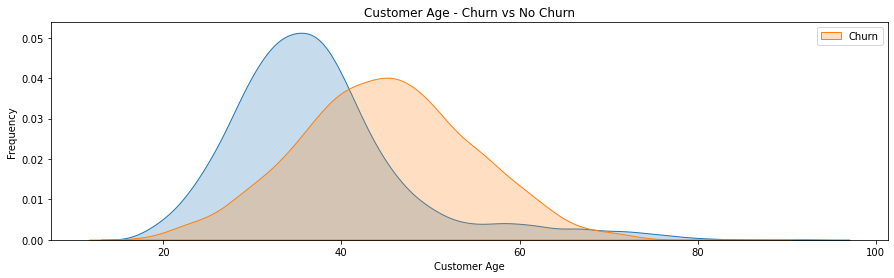

In [45]:
#inspect Churn versus Age

plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 0), 'Age'], shade= True)

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 1), 'Age'], shade = True, label ='Churn')
ax.set(xlabel='Customer Age', ylabel = 'Frequency')
plt.title('Customer Age - Churn vs No Churn')
plt.legend()

As the age of the customer increases, they usually churn more. 

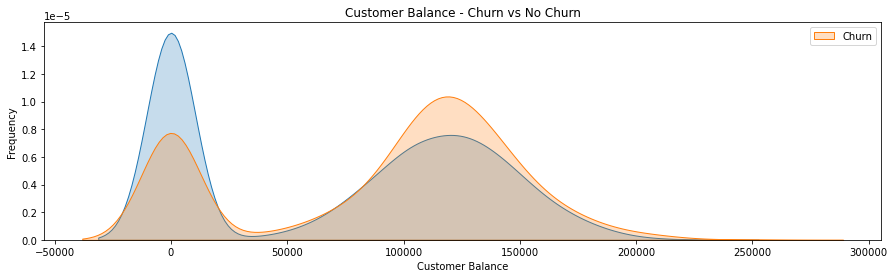

In [46]:
#plot Balance vs Churn

plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 0), 'Balance'], shade= True)

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 1), 'Balance'], shade = True, label ='Churn')
ax.set(xlabel='Customer Balance', ylabel = 'Frequency')
plt.title('Customer Balance - Churn vs No Churn')
plt.legend()

Customers with a negative to low balance churn less than customer with a balance between 75k - 150k. 

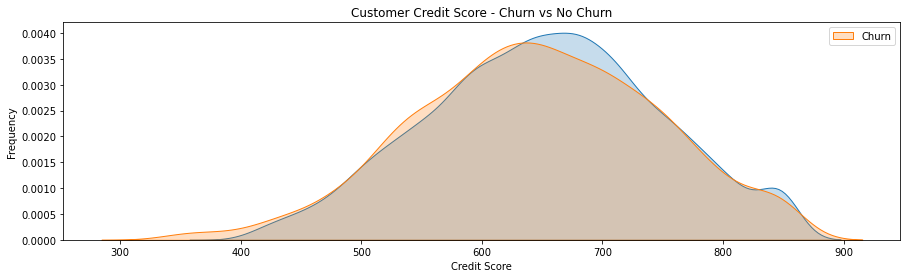

In [47]:
#Plot Credit Score versus Churn 

plt.figure(figsize=(15,4))

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 0), 'CreditScore'], shade= True)

ax = sns.kdeplot(churn.loc[(churn['Churn'] == 1), 'CreditScore'], shade = True, label ='Churn')
ax.set(xlabel='Credit Score', ylabel = 'Frequency')
plt.title('Customer Credit Score - Churn vs No Churn')
plt.legend()

Credit Scores around 600 churn while Credit scores around 650 did not. 

Text(0.5, 1.0, 'Number of Product VS Balance')

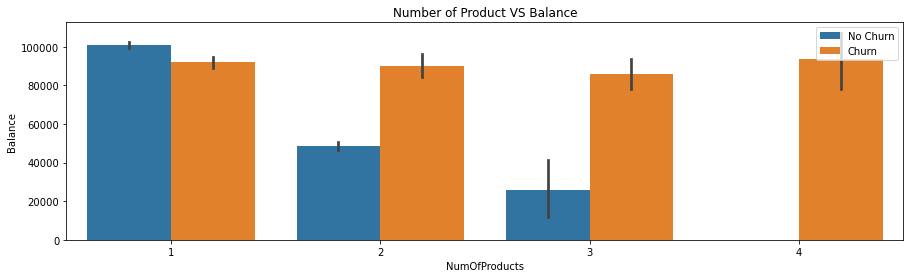

In [48]:
#Compare 3 variables by plotting Balance vs NumOfProducts by Churn

plt.figure(figsize=(15,4))

p=sns.barplot(x='NumOfProducts', y = 'Balance', hue = 'Churn',
             data = churn)
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Number of Product VS Balance')

As the number of products increase, the balance for churned customers remains very high. 

### End Exercise 7.06

## Modeling the Data

### Benefits of Feature Selection 
- **Reduces Training Time**
- **Reduces Overfitting**
- **Improves the Accuracy**

### Methods for Selecting Features
- **Univariate Feature Selection**
- **Recursive Feature Selection**
- **Principal Component Analysis (PCA)**
- **Tree-based Feature Selection** 

## Exercise 7.07: Performing Feature Selection
Perform feature selection using a tree-based selection method that performs well on classification tasks. 


In [49]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [50]:
#Encode the categorial variables

churn.dtypes

churn['Geography'] = churn['Geography'].astype('category').cat.codes
churn['Gender'] = churn['Gender'].astype('category').cat.codes
churn['HasCrCard'] = churn['HasCrCard'].astype('category').cat.codes
churn['Churn'] = churn['Churn'].astype('category').cat.codes

In [51]:
#split the data into training and testing sets

target = 'Churn'
X = churn.drop('Churn', axis=1)
y=churn[target]

X_trainM, X_testM, y_trainM, y_testM = train_test_split(X,y, test_size=.15,random_state=123,stratify=y)

In [53]:
#Fit the model in the random forest classifier for feature selection

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_trainM, y_trainM)

RandomForestClassifier(n_estimators=500, random_state=1)

In [55]:
# CAll teh random forest Feature_Importances_

importances = forest.feature_importances_

In [65]:
# Create a variable named features and store all columns except the target. Sort with NumPy's argsort function

features = churn.drop(['Churn'], axis=1).columns

indices = np.argsort(importances)[::-1]

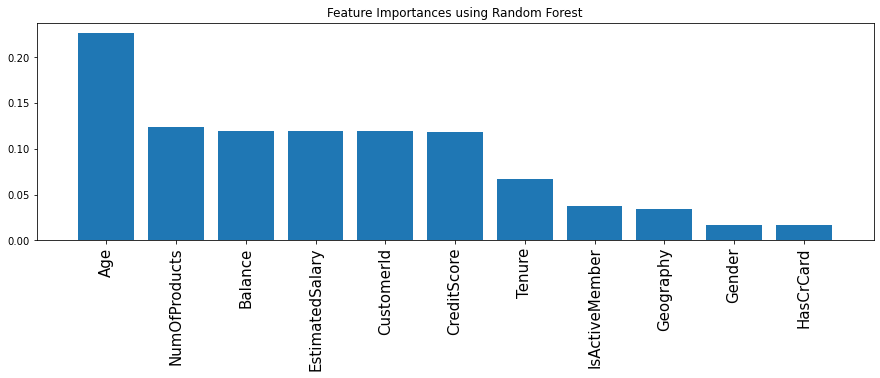

In [66]:
#plot the features obtained

plt.figure(figsize=(15,4))
plt.title('Feature Importances using Random Forest')
plt.bar(range(X_trainM.shape[1]),importances[indices], align='center')
plt.xticks(range(X_trainM.shape[1]), features[indices],
          rotation='vertical', fontsize=15)
plt.xlim([-1, X_trainM.shape[1]])
plt.show()

The top 5 most important features are:
1. Age
2. NumOfProducts
3. Balance
4. EstimatedSalary
5. CreditScore

In [68]:
#Place features of importance in a DataFrame

feature_importance_df = pd.DataFrame({'Feature':features,
                                     'Importance':importances})
print(feature_importance_df)

            Feature  Importance
0        CustomerId    0.119144
1       CreditScore    0.118316
2         Geography    0.034728
3            Gender    0.017226
4               Age    0.226433
5            Tenure    0.067542
6           Balance    0.119634
7     NumOfProducts    0.123679
8         HasCrCard    0.016369
9    IsActiveMember    0.037644
10  EstimatedSalary    0.119285


### End Exercise 7.07

## Model Building

Fit a logistic regression model on the most relevant features

Use Statsmodel package. 
- import statsmodel.api as sm

create a logistic regression model
- logreg = sm.Logit(y_train, x_train)
- logistic_regression = logReg.fit()

obtain the summary and model parameters:
- logistic_regression.summary
- logistic_regression.params

## Exercise 7.08: Building a Logistic Regression Model
Previously, the importance value of all the features were extracted. 
Build a logistic Regression model using the 5 most revelant features for predicting customer churn. 

The Customer's Attributes are: 
- Age: 50
- EstimatedSalary: 100,000
- CreditScore: 600
- Balance: 100,000
- NumOfProducts: 2

In [70]:
#import Statsmodel package

import statsmodels.api as sm

top5_features = ['Age', 'EstimatedSalary', 'CreditScore','Balance','NumOfProducts']

logReg = sm. Logit(y_trainM, X_trainM[top5_features])

logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [71]:
# Obtain the summary and parameters of the model

logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

EstimatedSalary and Balance have a small effect compared to the others.

In [73]:
#create a function to compute the coefficients

coef = logistic_regression.params

def y (coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts) : 
    return coef[0]*Age+ coef[1]*EstimatedSalary+coef[2]*CreditScore+coef[1]*Balance+coef[2]*NumOfProducts

The Customer's Attributes are:

- Age: 50
- EstimatedSalary: 100,000
- CreditScore: 600
- Balance: 100,000
- NumOfProducts: 2

In [74]:
#Calculate the change of the customer churning:

y1 = y(coef, 50, 100000, 600, 100000, 2)

p = np.exp(y1) / (1+np.exp(y1))
p

0.3823017864835243

This Customer has a 38% chance to churn. 

In [75]:
# implement scikit-learn's Logistic regression Model. 
from sklearn.linear_model import LogisticRegression


In [76]:
#Fit the model 

clf = LogisticRegression(random_state=0, solver = 'lbfgs').fit(X_trainM[top5_features], y_trainM)

The 'lbfgs' solver optimizes the algorithm and is recommende for smaller data sets. 

In [80]:
#Call the Predict and Predict_proba functions

clf.predict(X_testM[top5_features])
clf.predict_proba(X_testM[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

The Left = 61% chance to not Churn.

The Right = 38% chance to churn.

In [81]:
#Calculate the accuracy of the Model using the score function:

clf.score(X_testM[top5_features], y_testM)

0.79

The Model has a 79% accuracy

### End Exercise 7.08

## Interpreting the Data:
- The percentage of Customers that churned is 20.37% and percentage that did not churn is 79.63%.
- Overall, the average credit score of the customer who churned is 645.35 and the average age of the customer who churned is 44.83.
- The average balance and estimated salary of the customers who churned are 911,108.53 and 101,465.67. This is greater than those who did not churn.
- The median number of products purchased by the customer who churned is 1. 
- Customer age and churn are 29% positively correlated. 
- Balance and Churn are 12% positively correlated. 
- The number of products purchased and the customers's balance are 30% negatively correlated. 
- The difference between churn anad non-churn customers in Germany and Spain is less than in France.
- Comparatively, more female customers have churned. The amount of churn is greater for customers who have purchased 3-4 products.
- Customers within the 35-45 age group seem to churn more. as the Age of the Customer increases, they usually churn more. 
- The amount of churn is less with customers with negative to low balance compared to customers having a balance of 75,000 - 150,000.
- The most important features selected from the tree-based feature selection are Age, Estimated Salary, Credit Score, Balance, and NumOfProducts.